# Credit Card Customers_Exploratory Data Analysis


In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline. 

The steps will: 

   - __1. Cleaning, EDA, and Visualization__
   - 2. Feature Engineering and Feature Scaling
   - 3. Oversampling 
   - 4. Hyperparamer Tuning for Gradient Boosting Model
   - 5. Building Model Pipeline
   
==========================================================================================

### Overview

The goal of the project is to build a machine learning model to predict whether customers get churn or continue to use the credit card service based on different explanatory variables describing aspects of customer information. 

Customer Churn (customer attrition) is the most challenge problem for business such as credit cards or telecommunication companies etc. It would be nice to build a model to predict who is going to churn, because it can help improve business and companies can prevent from losing their customers. 

In this project, I will analyze [credit card customers' dataset](https://www.kaggle.com/sakshigoyal7/credit-card-customers). The data contains 10,127 customers with 23 features including their age, salary, marital sattus, credit card limit, credit card category, etc. More details for the dataset is [here](https://leaps.analyttica.com/sample_cases/11).


In this notebook, I will explore, clean and create some visualizations. If you want to see the work regarding building models, please see **[Building_Model_Pipeline.ipynb]**. 


### Import Packages

In [1]:
import numpy as np
from numpy import where
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
from collections import Counter
warnings.filterwarnings('ignore')

import sys
from pathlib import Path
import os
os.getcwd()

'/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/CreditCard'

In [2]:
# set up path for data
path = Path('/Users/yejiseoung/Dropbox/My Mac (Yejis-MacBook-Pro.local)/Documents/Projects/CreditCard/Data/')

In [3]:
# Visualizations libraries
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable


## EDA

### Data Load

In [5]:
df = pd.read_csv(path/'BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
df.shape

(10127, 23)

We have 10,127 data with 23 features. 

In [7]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


Data scales vary so that we might need to use feature scaling methods if we use linear models. 

In [8]:
df[df['CLIENTNUM'].duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


We don't have duplicate client IDs, so `CLIENTNUM` is not useful variable, and we can drop this variable. And, I will drop `Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1`,`Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2`.

In [9]:
# drop unuseful columns
df.drop(['CLIENTNUM',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
     'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
        axis=1, inplace=True)

In [10]:
# Are there missing observations?
[var for var in df.columns if df[var].isnull().mean()>0]

[]

This dataset doesn't have any missing values. 

Before we take a look at data, let's create two lists for categorical and numerical variables. 

In [11]:
# create categorical variable list
cat_vars = [var for var in df.columns 
            if df[var].dtype == 'O' and var != 'Attrition_Flag']

# create numerical variable list
num_vars = [var for var in df.columns
           if df[var].dtype != 'O']

print('The number of categorical variables: {}'.format(len(cat_vars)))
print('The number of numerical variables: {}'.format(len(num_vars)))

The number of categorical variables: 5
The number of numerical variables: 14


## Data Exploration

### Target variable

We have a classification problem and target is binary variable. 

In [13]:
# the percentage of the value distribution of target. 
df['Attrition_Flag'].value_counts() / len(df)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [14]:
# change the column name of target
df = df.rename(columns={'Attrition_Flag': 'Churn'})


# let's change the value name of target
target_map = {'Existing Customer': 'Exist',
             'Attrited Customer': 'Churn'}

df['Churn'] = df['Churn'].map(target_map)

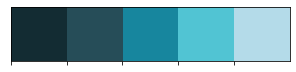

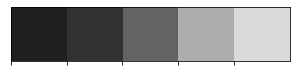

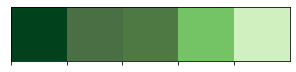

In [15]:
# set up the colors for visualization
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_green)

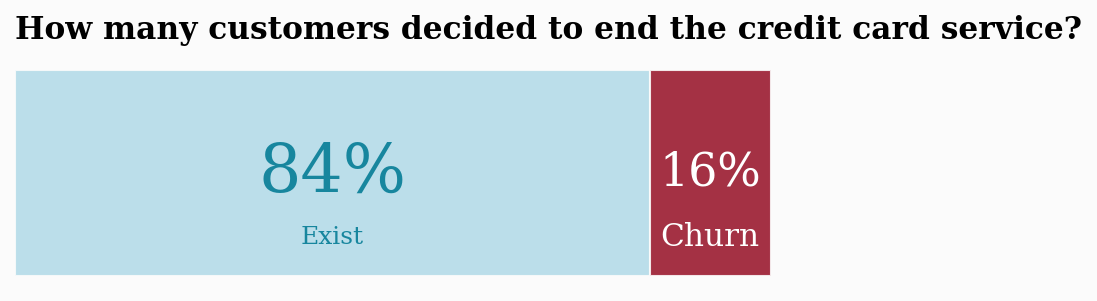

In [16]:
# Create data to present
x = df.groupby(['Churn'])['Churn'].count()
y = len(df)
r = ((x/y)).round(2)
ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(6.5, 2), dpi=150)
background_color = '#fbfbfb'
fig.patch.set_facecolor(background_color) # set up background color
ax.set_facecolor(background_color) # set up background color

# Create barh graph
ax.barh(ratio.index, ratio['Exist'], color=colors_blue[4], alpha=0.9, 
       ec=background_color, label='Exist')
ax.barh(ratio.index, ratio['Churn'], left=ratio['Exist'], color='#9b1b30',
       alpha=0.9, ec=background_color, label='Churn')

ax.set_xlim(0,1)
ax.set_xticks([]) # set up xtick as None 
ax.set_yticks([]) # set up ytick as None
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# set up the annotation for data
for i in ratio.index:
    ax.annotate(f"{int(ratio['Exist'][i]*100)}%", xy=(ratio['Exist'][i]/2, i),
               va = 'center', ha= 'center', fontsize=32, fontweight='light',
               fontfamily='serif', color=colors_blue[2])
    ax.annotate('Exist', xy=(ratio['Exist'][i]/2, -0.25), va='center', ha='center',
               fontsize=12, fontweight='light', fontfamily='serif', color=colors_blue[2])
    

for i in ratio.index:
    ax.annotate(f"{int(ratio['Churn'][i]*100)}%", xy=(ratio['Exist'][i]+ratio['Churn'][i]/2, i),
               va='center', ha='center', fontsize=22, fontweight='light',
               fontfamily='serif', color='white')
    ax.annotate('Churn', xy=(ratio['Exist'][i]+ratio['Churn'][i]/2, -0.25),
               va='center', ha='center', fontsize=15, fontweight='light', fontfamily='serif', color='white')


fig.text(0.125, 0.95, 'How many customers decided to end the credit card service?', 
        fontfamily='serif', fontweight='bold', fontsize=15)

plt.show()

We have 83% of Existing customer data and 16% of Attrited customer data. Based on the percentage of the distribution of target, we can say that this dataset is imbalanced. Therefore, when we choose evaluation metrics, we need to consider imbalanced distribution of the target, and we should avoid to use accuracy. 

### Numerical variables 

We have 14 numerical variables. 

In [17]:
# create continous and discrete variable lists 
continous = []
discrete = []
for num in num_vars:
    if df[num].nunique() < 10:
        discrete.append(num)
    else: 
        continous.append(num)
        
print('There are {} continous variables'.format(len(continous)))
print('The continous variables are: {}'.format(continous))
print('')
print('There are {} discrete variables'.format(len(discrete)))
print('The discrete variable is: {}'.format(discrete))

There are 10 continous variables
The continous variables are: ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

There are 4 discrete variables
The discrete variable is: ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']


#### Continous Variables

Let's create histograms of continuos variables and boxplots to see if they have outliers. 

In [18]:
def plot_nums(df, variable):
    """ Function to visualize histogram, q-q plot and box plot for continous variables"""
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1,3,1)
    df[variable].hist(bins=30)
    plt.title('Histogram')
    plt.xlabel(variable)
    
    plt.subplot(1,3,2)
    stats.probplot(df[variable], plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()


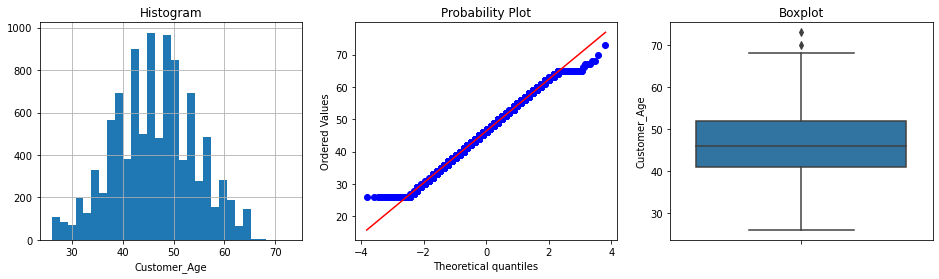

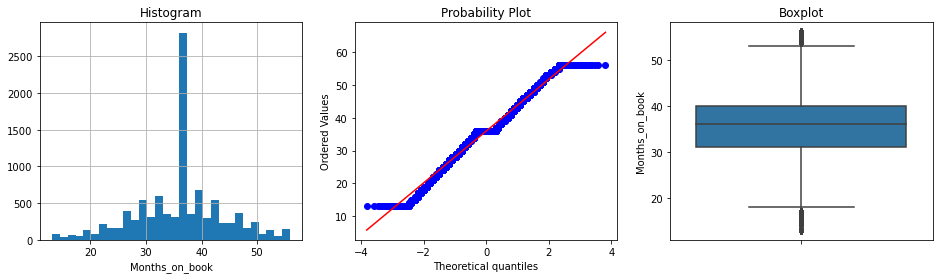

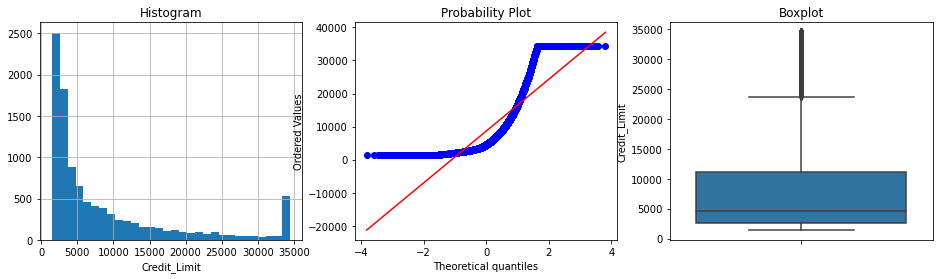

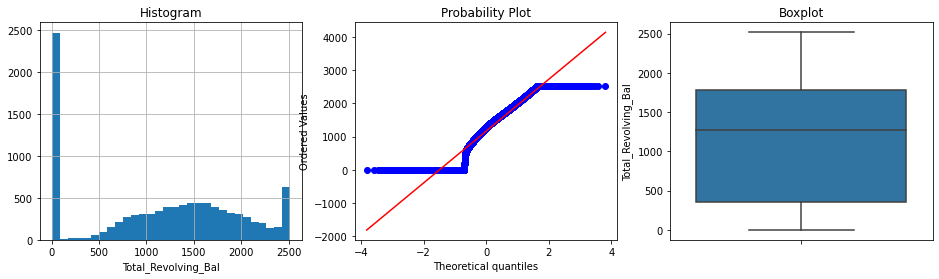

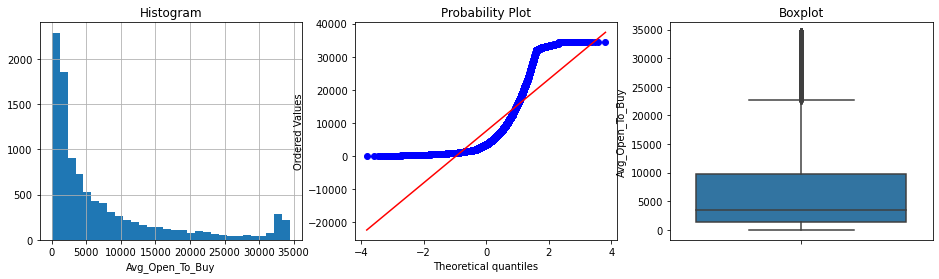

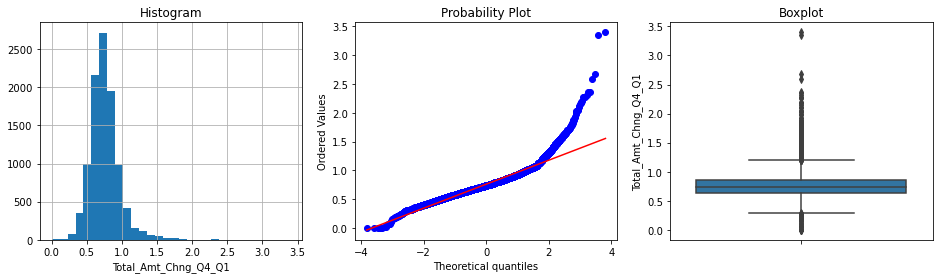

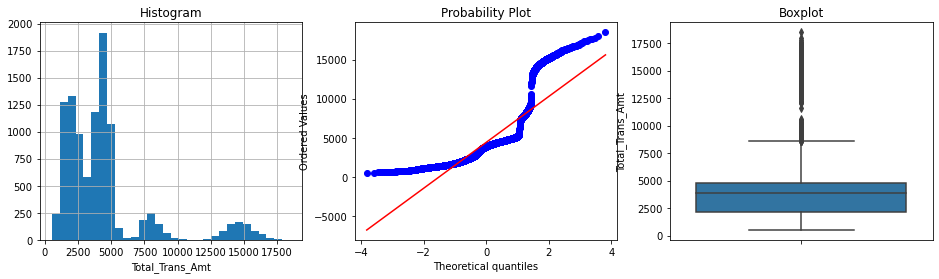

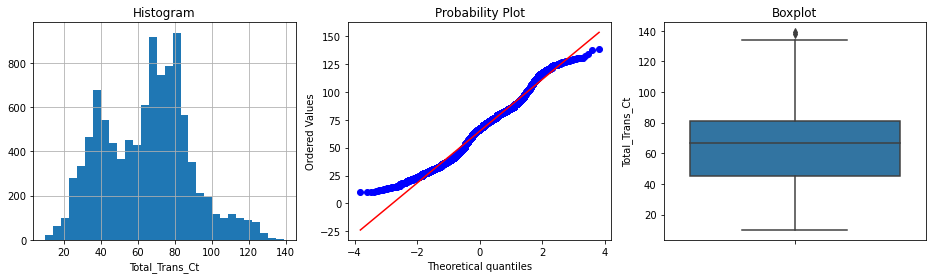

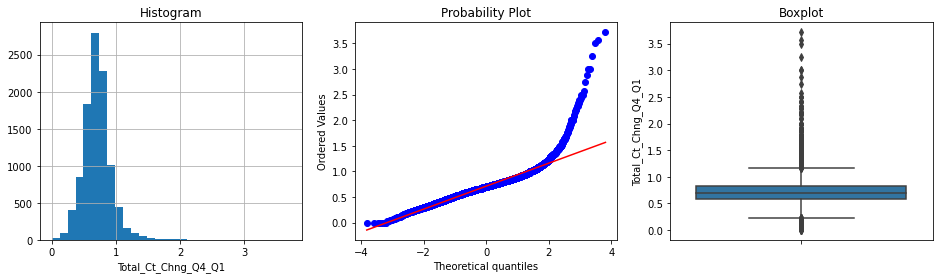

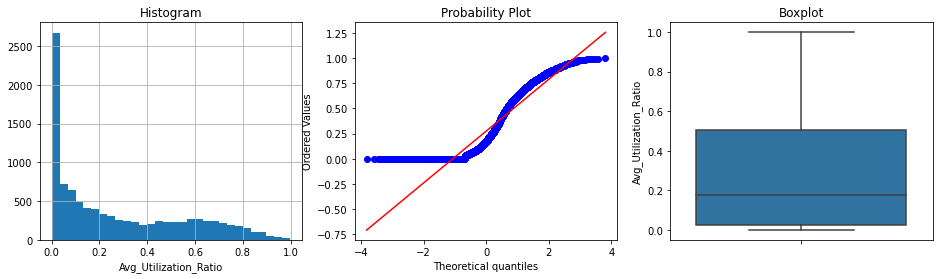

In [19]:
for var in continous:
    plot_nums(df, var)

- **Observations:**
    - **Customer_Age**: It has a normal distribution with outliers (>70). 
    - **Months_on_book**: It is a gaussian distribution but has the extreme peak of 36.
    - **Credit_Limit**: It is skewed distribution towards right with a lot of outliers (>25000). 
    - **Total_Revolving_Bal**: It has a lot of 0 values and it doesn't show a gaussian distribution. 
    - **Avg_Open_To_Buy**: It is skewed distribution towards right with a lot of outliers.
    - **Total_Amt_Chng_Q4_Q1**: It shows a gaussian distribution with outliers.
    - **Total_Trans_Amt**: It doesn't have a normal distribution. 
    - **Total_Trans_Ct**: It looks like binomial distribution (with two peaks). 
    - **Total_Ct_Chng_Q4_Q1**: It has a gaussian distribution with outliers.
    - **Avg_Utilization_Ratio**: It has skewed distribution towards right. 
    
    
- **NOTE**: We might need to use data transformation methods (e.g. log transformation, or yeo-johnson transformation), because we have skewed distributed variables.

We saw the distributions of continuous variables. 

Now, let's see the differences between churn customers and existing customers depending on each feature. 

In [22]:
# create two groups for Exist and Churn
Exist = df[df['Churn']!='Churn']
Churn = df[df['Churn']=='Churn']

In [23]:
Exist.shape, Churn.shape

((8500, 20), (1627, 20))

Text(19, 0.065, '- Exist group has binomial distribution, but Churn group shows right-skewed distribution.')

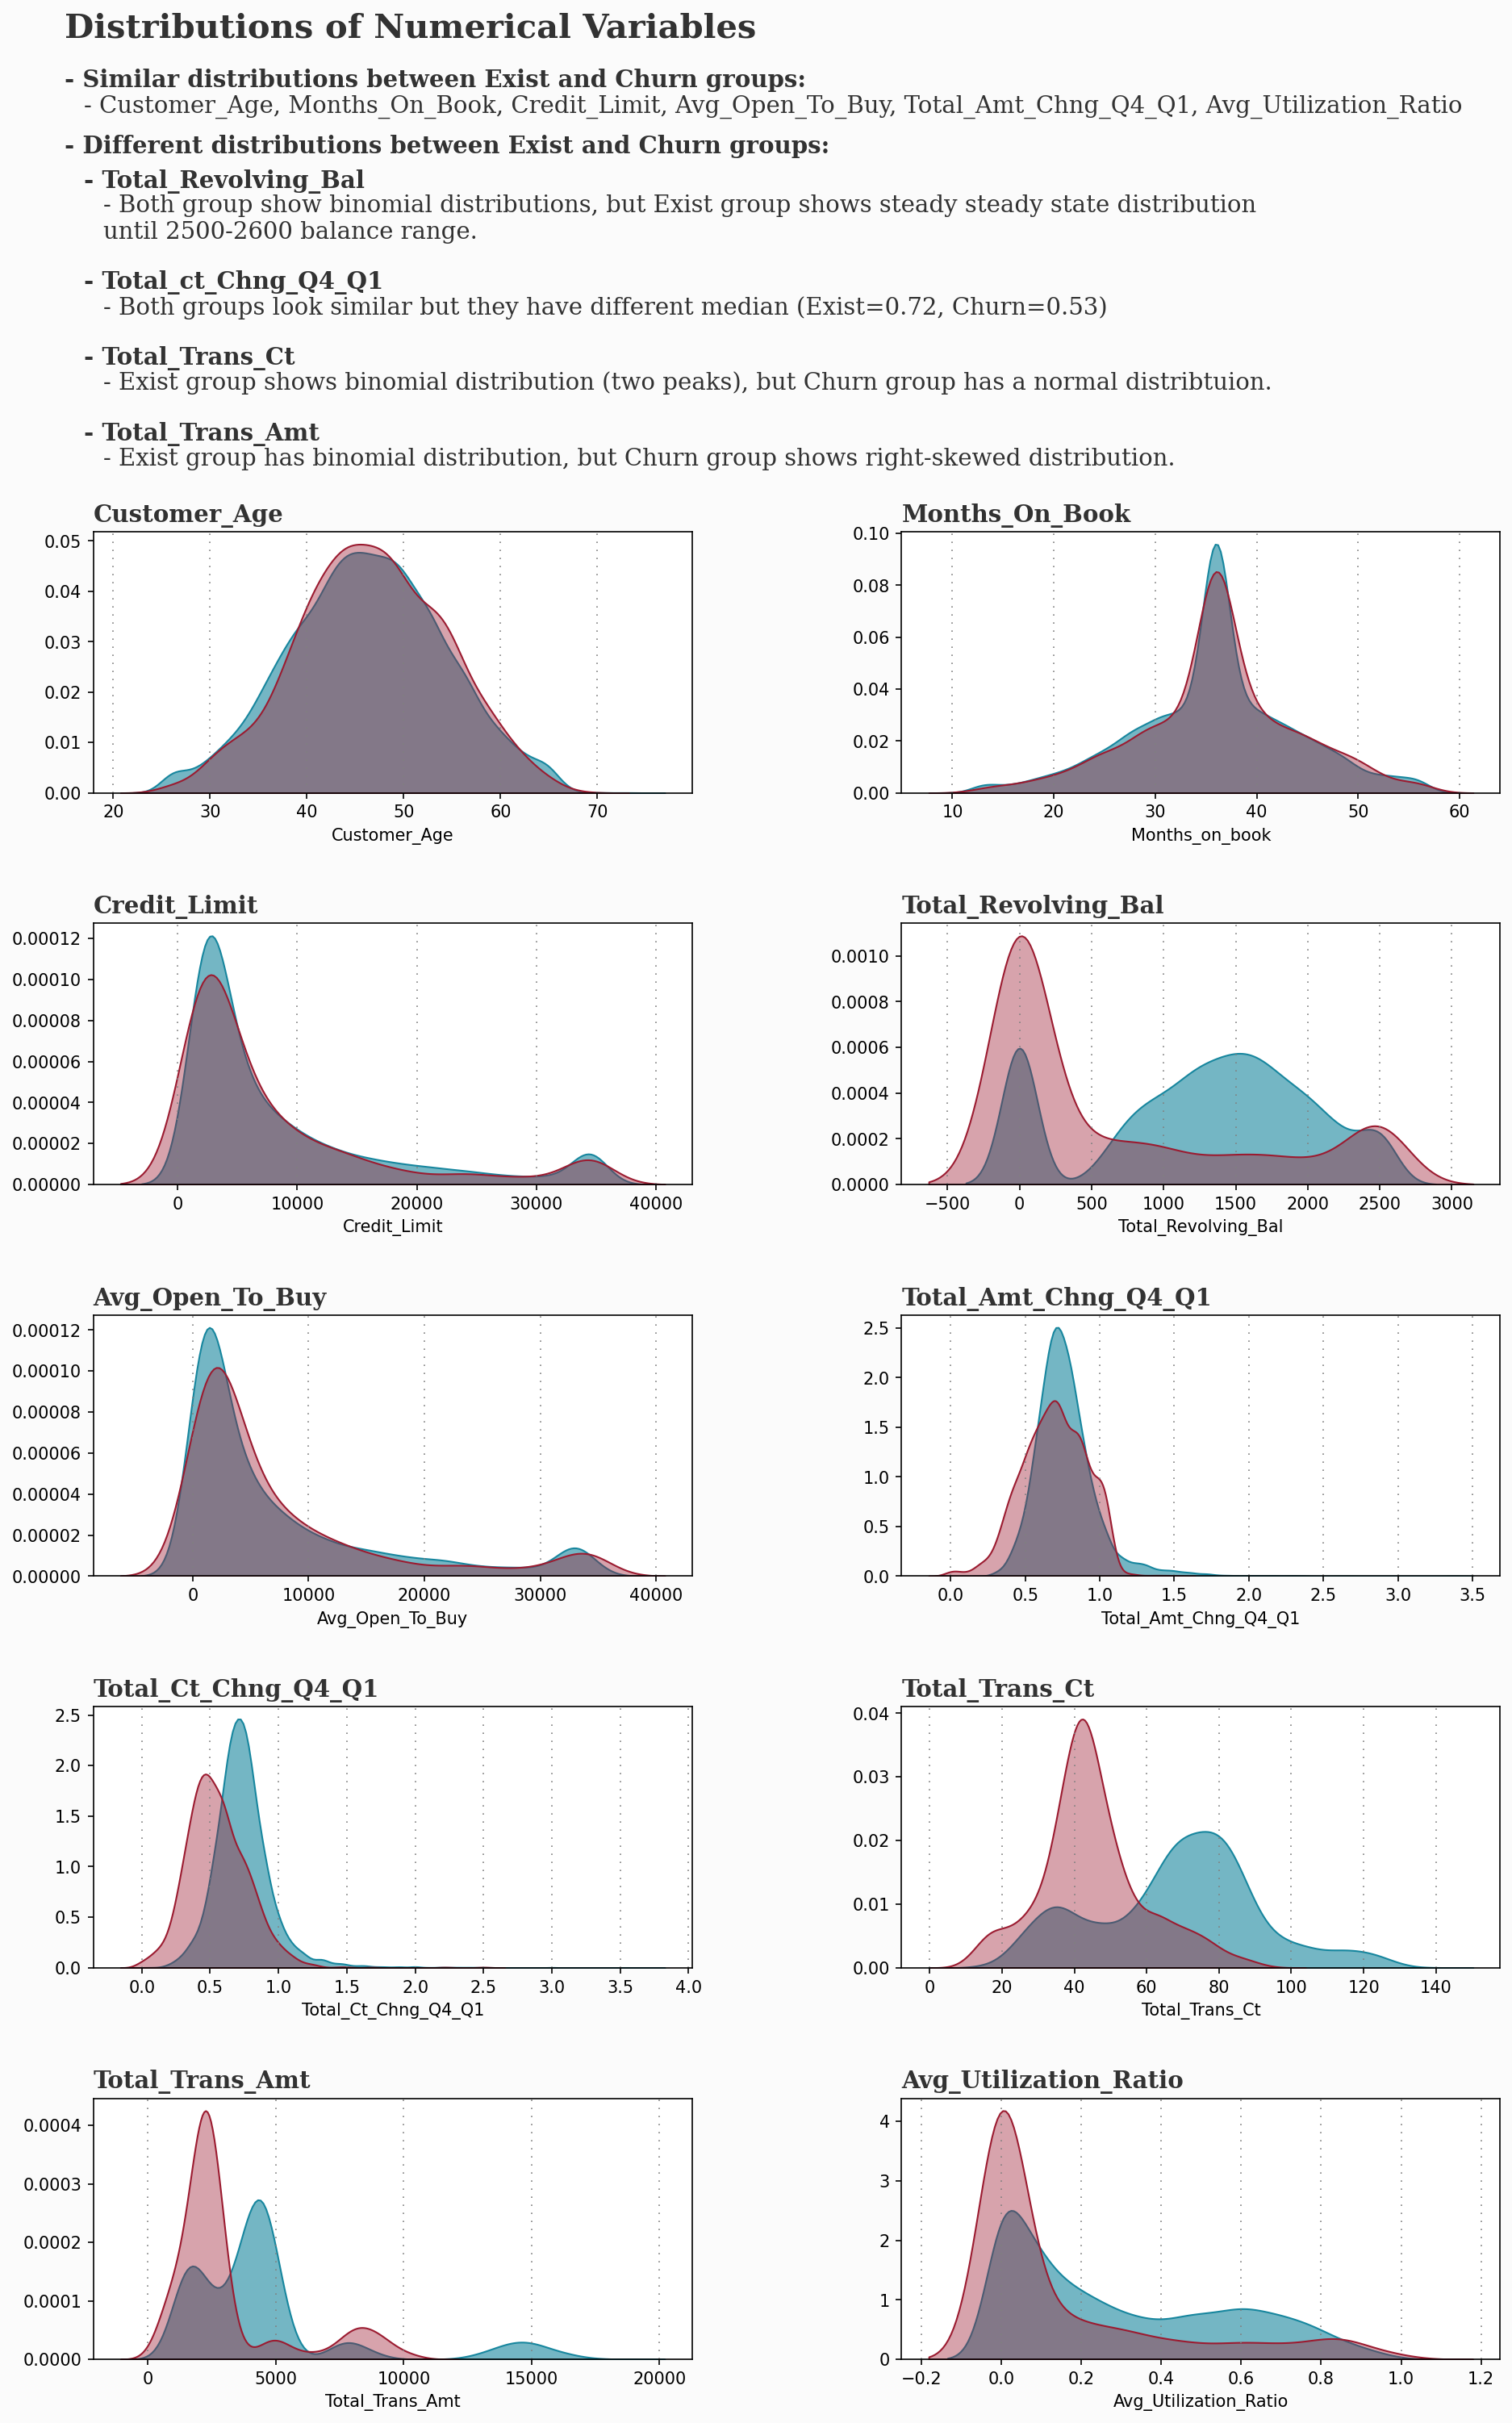

In [24]:
background_color = '#fbfbfb'

fig = plt.figure(figsize=(15,20), dpi=150)
fig.patch.set_facecolor(background_color) # set up background color
gs = fig.add_gridspec(5, 2)
gs.update(wspace=0.35, hspace=0.5)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
        fig.add_subplot(gs[0,1]),
        fig.add_subplot(gs[1,0]),
        fig.add_subplot(gs[1,1]),
        fig.add_subplot(gs[2,0]),
        fig.add_subplot(gs[2,1]),
        fig.add_subplot(gs[3,0]),
        fig.add_subplot(gs[3,1]),
        fig.add_subplot(gs[4,0]),
        fig.add_subplot(gs[4,1])]

# numeric columns as a list
num_feats = ['Customer_Age', 'Months_on_book','Credit_Limit','Total_Revolving_Bal',
             'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1', 
             'Total_Trans_Ct','Total_Trans_Amt', 'Avg_Utilization_Ratio']

def HistPlots(df, xVar, ax):
    """ Function to create histograms for numerical variables
    Args:
        df: dataframe
        xVar: a list for numerical variables
        ax: ax for each graph
    """
    # create histograms
    sns.kdeplot(Exist[xVar], ax=ax, color=colors_blue[2], alpha=0.6, shade=True, label='Exist')
    sns.kdeplot(Churn[xVar], ax=ax, color='#9b1b30', alpha=0.4, shade=True, label='Churn')
    ax.grid(which='major', color='gray', linestyle=':', axis='x', zorder=0, dashes=(1,5))
    #ax.set(yticks=[])
    ax.set_title(f'{xVar}'.title(), fontsize=14, fontweight='bold', fontfamily='serif',
                color='#323232', loc='left')

    ax.set_ylabel('')

    
    # create histograms by using zip
for ax, xVar in zip(axes, num_feats):
    HistPlots(df, xVar, ax)
    

# Add observations
axes[0].text(15, 0.15, 'Distributions of Numerical Variables',
            fontsize=20, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(15, 0.14, '- Similar distributions between Exist and Churn groups:',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(17, 0.135, '- Customer_Age, Months_On_Book, Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Avg_Utilization_Ratio',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(15, 0.127, '- Different distributions between Exist and Churn groups:',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(17, 0.120, '- Total_Revolving_Bal',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(19, 0.110, '- Both group show binomial distributions, but Exist group shows steady steady state distribution \nuntil 2500-2600 balance range. ',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(17, 0.100, '- Total_ct_Chng_Q4_Q1',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(19, 0.095, '- Both groups look similar but they have different median (Exist=0.72, Churn=0.53)',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(17, 0.085, '- Total_Trans_Ct',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(19, 0.080, '- Exist group shows binomial distribution (two peaks), but Churn group has a normal distribtuion.',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

axes[0].text(17, 0.070, '- Total_Trans_Amt',
            fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(19, 0.065, '- Exist group has binomial distribution, but Churn group shows right-skewed distribution.',
            fontsize=14, fontweight='light', fontfamily='serif', color='#323232')

- **Observations for comparison histgrams**:

    - **Age**: Customer age. Both groups show normal distributions.
    - **Months_on_book**: Months on book (Time of Relationship). As we can see in the graph below, both existing and churn groups have similar distribution patterns, and the medians are 36 months.
    - **Credit_Limit**: Credit limit shows the credit limit on the credit cards. Both existing and churn groups are right-skewed distributions, and there are a lot of people who have 2k-4k credit limits.
    - **Total_Revolving_Bal**: It shows the total revloving balance on the credit card. We can see the differences between exist and churn groups. 1) Churn group distribution is more likely to be a normal distribution except for 0-99 total revolving balance range. However, existing group shows steady state distribution until 2500-2600 balance range. There are some similarities between existing and churn groups: 1) The highest values of both groups are 0-99 total revolving balance. 2) They show high frequencies in 2500-2600 total revolving balances.
    - **Avg_Open_To_Buy**: It shows open to buy credit line (average of last 12 months). Both exist and churn groups show right-skewed distribtuions.
    - **Total_Amt_Chng_Q4_Q1**: It shows total change in transaction amount (Q4 over Q1). Both groups are normal distributions with outliers. Existing group has more outliers.
    - **Total_Ct_Chng_Q4_Q1**: Both distributions show normal distributions, but there are a lot of outliers.
    - **Total_Trans_Ct**: For exist group, it shows binomial distribution. We can see that there are two peaks between 35 and 39, and between 75 and 79. For churn group, it shows a normal distribtuion, and the median is 43.
    - **Total_Trans_Amt**: Total Transaction Amount (Last 12 months). Both are right skewed distributions but there are some differences between existing and churn groups. 1) for existing group, there are a lot of customers in 4000-4999 range, while there are large number of customers in 2000-2999 range for churn group. 2) the second most highest value is 1000-1999 range for both groups, but there are few customers who are in the range more than 3000 for churn group.
    - **Avg_Utilization_Ratio**: Average card utilization ratio. Both groups show right skewed distributions.
    
    
**NOTE**: The variables which showed differences between churn and exist customers might be good predictors when building machine learning models. 

#### Discrete variables

We have 4 discrete variables. Here, we will create bar charts for those variables, and see each data shape. Also, we will explore if there are some differences between churn and exist customers on those discrete variables. 

In [27]:
def barPerc(df, xVar, ax):
    """
    source: https://stackoverflow.com/a/67076347/4852724
    
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable
        ax: Axes object (for Seaborn Countplot/Bar plot or
                             pandas bar plot)
    """
    # 1. How many X categories
    ## check for NaN and remove
    numX = len([x for x in df[xVar].unique() if x==x])
    
    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##     [0, 8, 16, 24] are hue bars for 1st X category
        hueBars = bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])
        
        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                   bar.get_height() - 0.1 * bar.get_height(),
                   f"{bar.get_height()/total:.2%}",
                   ha='center', va='top', color='black')

def GrpSubplots(df, xVar, ax, axis=None, ticklabels=None):
    """
    Create subplots based on X variables
    """
    df.groupby([xVar, 'Churn']).size().unstack('Churn').apply(lambda x: x*100/x.sum(), axis=axis).plot.bar(rot=0,
                                                                                                           width=0.9,
                                                                                                           color=[colors_green[4], colors_blue[4]],
                                                                                                           ax=ax);
    ax.set_title(f'{xVar}'.title(), fontsize=14, fontweight='bold', fontfamily='serif', color='#323232', loc='left')
    ax.grid(color='gray', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    ax.set_xticklabels(ticklabels)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.get_legend().remove()
    
    barPerc(df, xVar, ax)
    


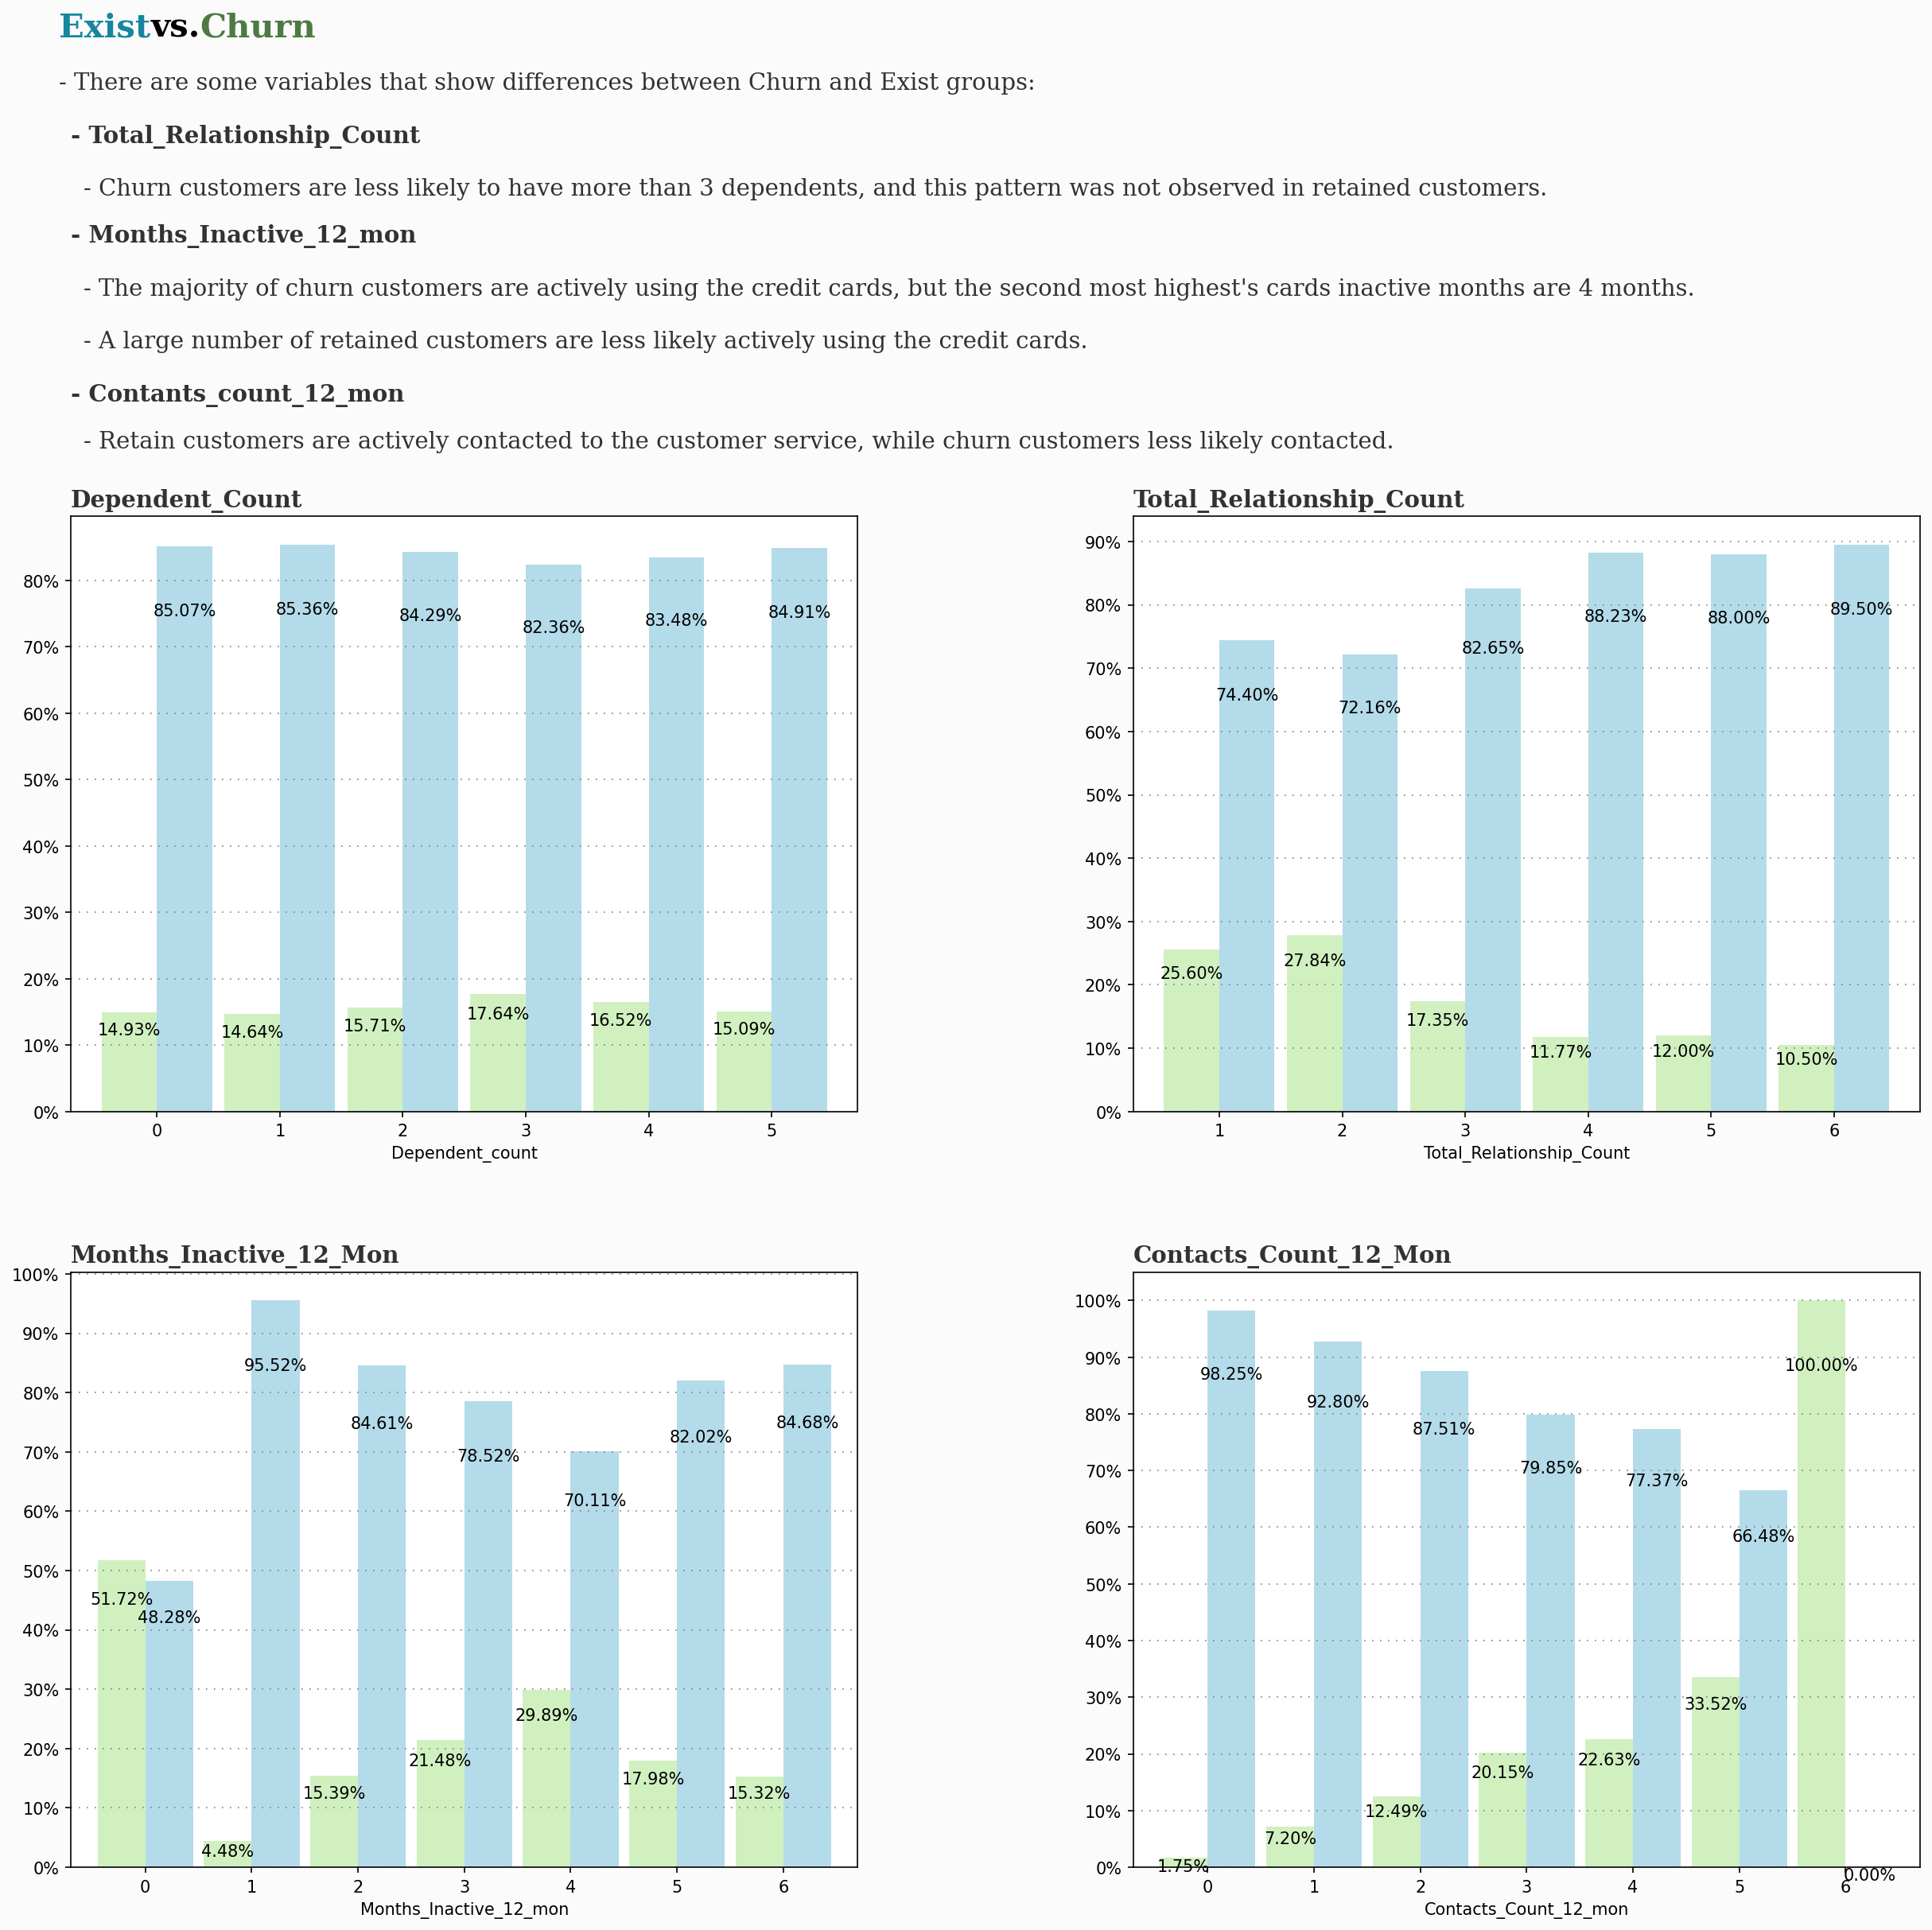

In [33]:
background_color='#fbfbfb'

fig = plt.figure(figsize=(20,15), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.35, hspace=0.27)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
       fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[1,0]),
       fig.add_subplot(gs[1,1])]

# categories as a list
cats = ['Dependent_count', 'Total_Relationship_Count', 
        'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

# ticklabels as list
tlabs = [[0, 1, 2, 3, 4, 5]] + [[1,2,3,4,5,6]] + [[0, 1, 2, 3, 4, 5, 6]]*2 

for ax, xVar, ticklabels in zip(axes, cats, tlabs):
    GrpSubplots(df, xVar, ax, axis=1, ticklabels=ticklabels)

# green - churn
# blue - exist

axes[0].text(-0.80, 162, 'Exist', fontsize=20, 
        fontweight='bold', fontfamily='serif', color=colors_blue[2])
axes[0].text(-0.05, 162, 'vs.', fontsize=20,
        fontweight='bold', fontfamily='serif', color='black')
axes[0].text(0.35, 162, 'Churn', fontsize=20,
        fontweight='bold', fontfamily='serif', color=colors_green[2])
axes[0].text(-0.80, 154, '- There are some variables that show differences between Churn and Exist groups:',
        fontsize=14, fontfamily='serif', color='#323232')
axes[0].text(-0.70, 146, '- Total_Relationship_Count',
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 138, "- Churn customers are less likely to have more than 3 dependents, and this pattern was not observed in retained customers.",
        fontsize=14, fontfamily='serif', color='#323232')
axes[0].text(-0.70, 131, "- Months_Inactive_12_mon",
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 123, "- The majority of churn customers are actively using the credit cards, but the second most highest's cards inactive months are 4 months.",
        fontsize=14, fontfamily='serif', color='#323232')
axes[0].text(-0.60, 115, "- A large number of retained customers are less likely actively using the credit cards.",
        fontsize=14, fontfamily='serif', color='#323232')

axes[0].text(-0.70, 107, "- Contants_count_12_mon",
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 100, "- Retain customers are actively contacted to the customer service, while churn customers less likely contacted.",
        fontsize=14, fontfamily='serif', color='#323232');

### Categorical variables

We have 5 categorical variables. Let's look at the number of cardinality in each categorical variable. 

In [53]:
df[cat_vars].head(2)

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue


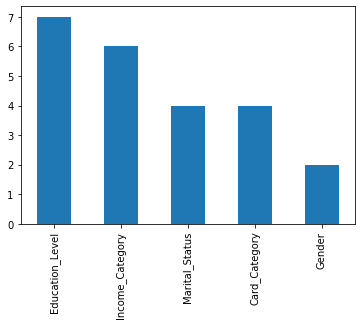

In [55]:
df[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(6,4));

All categorical variables show low cardinality, this means that they have only few different labels. This is good as we don't need to tackle cardinality. 

Next, let's explore whether each categorical variable has rare label. 

In [56]:
for var in cat_vars:
    print(var)
    print(df[var].value_counts()/len(df))
    print()

Gender
F    0.529081
M    0.470919
Name: Gender, dtype: float64

Education_Level
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64

Marital_Status
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64

Income_Category
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64

Card_Category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64



Even though some labels (e.g. Platinum in Card_Category) are rare labels (<5%), we don't need to treat with those labels because there is only one rare label in categories. 

Lastly, we would like to see the differences between Churn and Exist groups on categorical variables. 

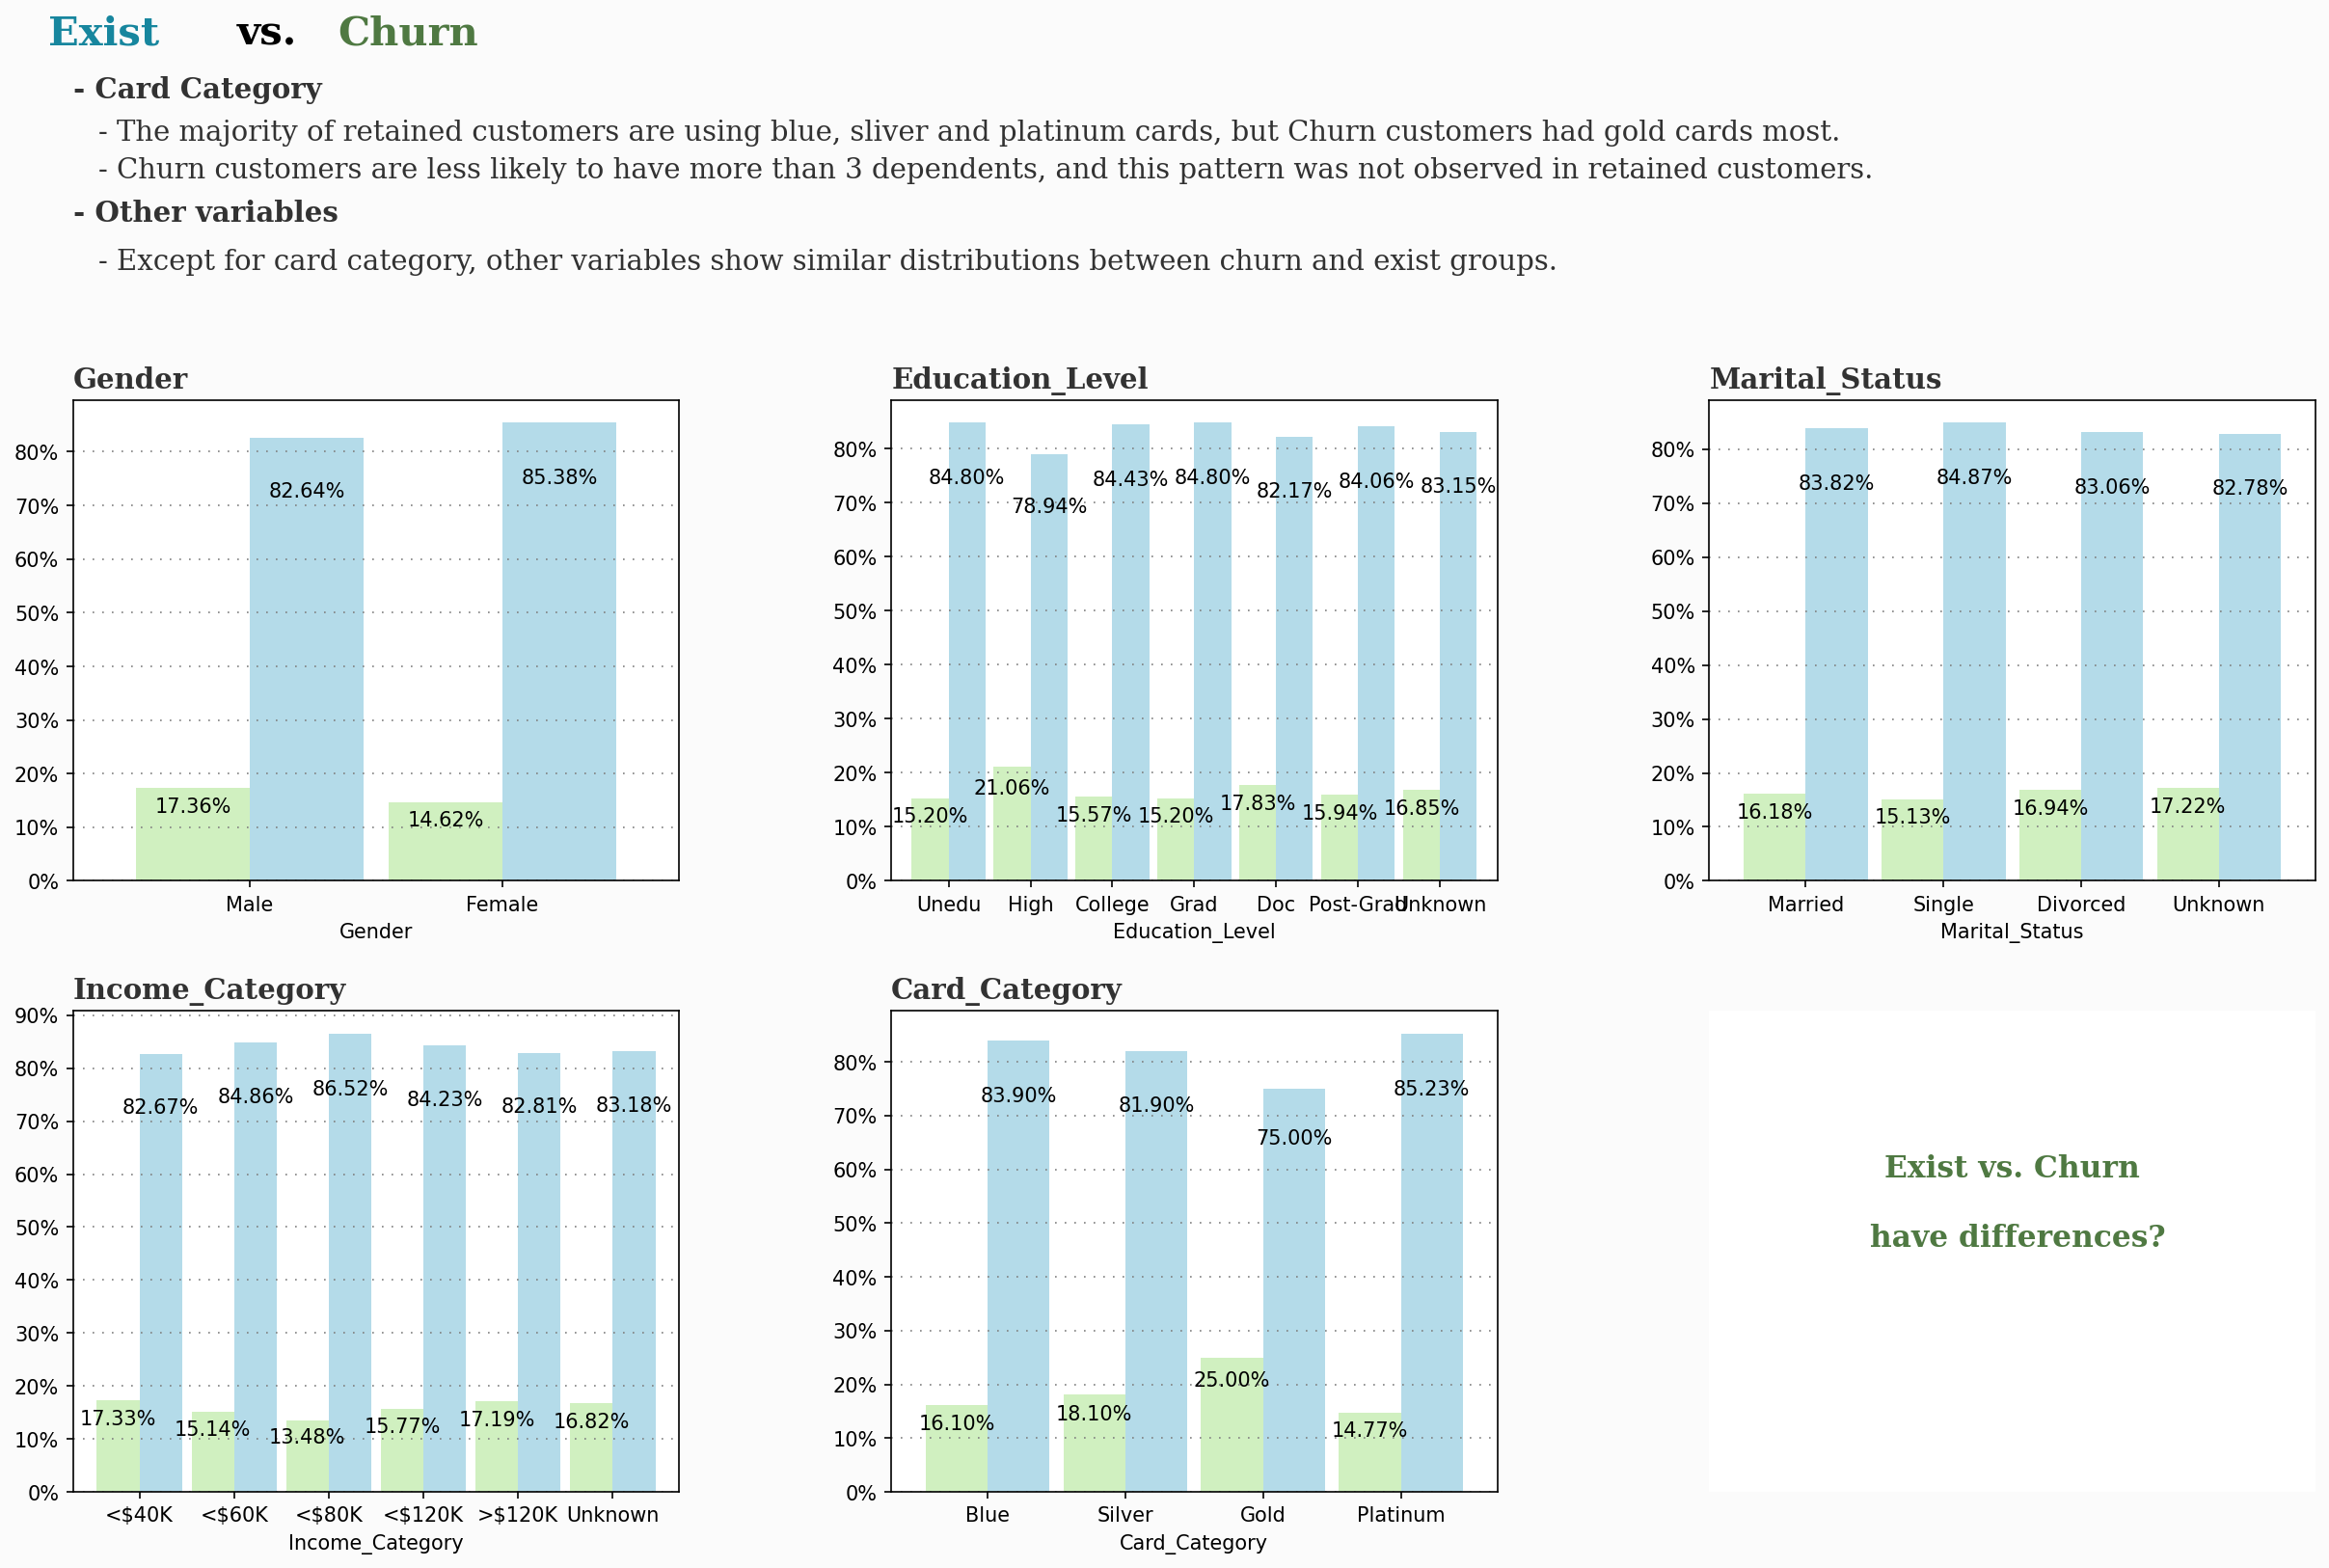

In [52]:
background_color='#fbfbfb'

fig = plt.figure(figsize=(20,10), dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.35, hspace=0.27)

# axes as a list
axes = [fig.add_subplot(gs[0,0]),
       fig.add_subplot(gs[0,1]),
       fig.add_subplot(gs[0,2]),
       fig.add_subplot(gs[1,0]),
       fig.add_subplot(gs[1,1]),
       fig.add_subplot(gs[1,2])]

# categories as a list
cats = ['Gender','Education_Level','Marital_Status',
        'Income_Category', 'Card_Category']

# ticklabels as list
tlabs = [['Male', 'Female']] + [['Unedu','High', 
                         'College','Grad','Doc',
                         'Post-Grad', 'Unknown']] + [['Married', 'Single',
                                                          'Divorced','Unknown']] + [['<$40K','<$60K',
                                                                                     '<$80K', '<$120K', '>$120K','Unknown']] + [['Blue','Silver',
                                                                                                                                              'Gold','Platinum']]

for ax, xVar, ticklabels in zip(axes, cats, tlabs):
    GrpSubplots(df, xVar, ax, axis=1, ticklabels=ticklabels)

# green - churn
# blue - exist


axes[5].spines["bottom"].set_visible(False)
axes[5].spines["top"].set_visible(False)
axes[5].spines["left"].set_visible(False)
axes[5].spines["right"].set_visible(False)
axes[5].tick_params(left=False, bottom=False)
axes[5].set_xticklabels([])
axes[5].set_yticklabels([])
axes[5].text(0.5, 0.6, 'Exist vs. Churn\n\n have differences?', 
             horizontalalignment='center', verticalalignment='center',
             fontsize=15, fontweight='bold', fontfamily='serif', color=colors_green[2])


axes[0].text(-0.80, 156, 'Exist', fontsize=20, 
        fontweight='bold', fontfamily='serif', color=colors_blue[2])
axes[0].text(-0.05, 156, 'vs.', fontsize=20,
        fontweight='bold', fontfamily='serif', color='black')
axes[0].text(0.35, 156, 'Churn', fontsize=20,
        fontweight='bold', fontfamily='serif', color=colors_green[2])

axes[0].text(-0.70, 146, '- Card Category',
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 138, '- The majority of retained customers are using blue, sliver and platinum cards, but Churn customers had gold cards most.',
        fontsize=14, fontfamily='serif', color='#323232')

axes[0].text(-0.60, 131, "- Churn customers are less likely to have more than 3 dependents, and this pattern was not observed in retained customers.",
        fontsize=14, fontfamily='serif', color='#323232')
axes[0].text(-0.70, 123, "- Other variables",
        fontsize=14, fontweight='bold', fontfamily='serif', color='#323232')
axes[0].text(-0.60, 114, "- Except for card category, other variables show similar distributions between churn and exist groups.",
        fontsize=14, fontfamily='serif', color='#323232');


### Correlation between numerical variables

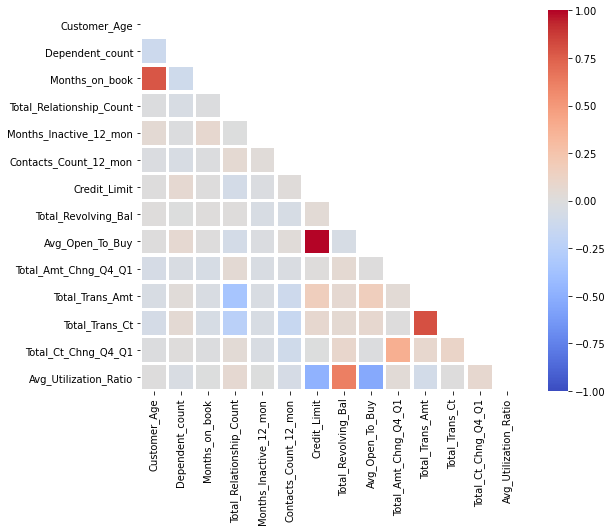

In [58]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,7))

pl = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, vmin=-1.0, 
                center=0, square=True, linewidths=2.5)
plt.show()

- __Customer_Age__ and __Months_on_book__ are highly positively correlated. 
- __Credit_Limit__ and __Avg_Open_To_Buy__ are highly positively correlated.
- __ToalTrans_Ct__ and __Total_Trans_Amt__ are positively correlated. 
- __Credit_Limit__ and __Avg_Utilization_Ratio__ are negatively correlated. 
- __Avg_Open_To_Buy__ and __Avg_Utilization_Ratio__ are negatively correlated.


__NOTE__: When performing feature selection, we need to consider these correlations between variables. 

## Conclusion

We have a classification problem with binary target variable. We have explored target and features, and their relationships. Also, we investigated whether Churn group is different from Exist group depending on features. 

This dataset does not contain any missing observation so that we don't need to deal with missing values. However, target distribution shows imbalanced distribution, and therefore when building models, we might need to use sample balancing methods to improve model performances. 

In the next notebook (DataPreparationForBuildingModel), we will perform sample balancing, feature engineering, and feature selection if necessary. Based on the baseline performance, we will build model pipeline. 